## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [32]:
# Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [33]:
df = pd.read_csv('Data/Cleaned_stud.csv')

In [34]:
df.rename(columns={
    'Gender': 'gender',
    'EthnicGroup': 'race_ethnicity',
    'ParentEduc': 'parental_level_of_education',
    'LunchType': 'lunch',
    'TestPrep': 'test_preparation_course',
    'MathScore': 'math_score',
    'ReadingScore': 'reading_score',
    'WritingScore': 'writing_score'
}, inplace=True)

#### Show Top 5 Records

In [35]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group C,bachelor's degree,standard,none,71.0,71.0,74.0,216.0,72.000000
1,female,group C,some college,standard,none,69.0,90.0,88.0,247.0,82.333333
2,female,group B,master's degree,standard,none,87.0,93.0,91.0,271.0,90.333333
3,male,group A,associate's degree,free/reduced,none,45.0,56.0,42.0,143.0,47.666667
4,male,group C,some college,standard,none,76.0,78.0,75.0,229.0,76.333333


#### Preparing X and Y variables

In [36]:
X = df.drop(columns=['math_score'],axis=1)

In [37]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,total score,average
0,female,group C,bachelor's degree,standard,none,71.0,74.0,216.0,72.000000
1,female,group C,some college,standard,none,90.0,88.0,247.0,82.333333
2,female,group B,master's degree,standard,none,93.0,91.0,271.0,90.333333
3,male,group A,associate's degree,free/reduced,none,56.0,42.0,143.0,47.666667
4,male,group C,some college,standard,none,78.0,75.0,229.0,76.333333


In [38]:
print("Categories in 'gender' variable: ",end=" " )
print(df['gender'].unique())

print("Categories in 'race ethnicity' variable: ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in parental level of education' variable: ",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race ethnicity' variable:  ['group C' 'group B' 'group A' 'group D' 'group E']
Categories in parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [39]:
y = df['math_score']

In [40]:
y

0        71.0
1        69.0
2        87.0
3        45.0
4        76.0
         ... 
30396    58.0
30397    59.0
30398    58.0
30399    61.0
30400    82.0
Name: math_score, Length: 30401, dtype: float64

In [41]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [42]:
X = preprocessor.fit_transform(X)

In [43]:
X.shape

(30401, 21)

In [44]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((24320, 21), (6081, 21))

#### Create an Evaluate Function to give all metrics after model Training

In [46]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae,mse, rmse, r2_square

In [47]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("-> Mean Squared Error: {:.4f}".format(model_train_mse))
    print("-> Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("-> Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("-> R2 Score: {:.4f}%".format(model_train_r2 * 100))

    print('-'*35)
    
    print('Model performance for Test set')
    print("-> Mean Squared Error: {:.4f}".format(model_test_mse))
    print("-> Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("-> Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("-> R2 Score: {:.4f}%".format(model_test_r2 * 100))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
-> Mean Squared Error: 0.0000
-> Root Mean Squared Error: 0.0000
-> Mean Absolute Error: 0.0000
-> R2 Score: 100.0000%
-----------------------------------
Model performance for Test set
-> Mean Squared Error: 0.0000
-> Root Mean Squared Error: 0.0000
-> Mean Absolute Error: 0.0000
-> R2 Score: 100.0000%


Lasso
Model performance for Training set
-> Mean Squared Error: 23.2007
-> Root Mean Squared Error: 4.8167
-> Mean Absolute Error: 3.8646
-> R2 Score: 90.1404%
-----------------------------------
Model performance for Test set
-> Mean Squared Error: 23.9014
-> Root Mean Squared Error: 4.8889
-> Mean Absolute Error: 3.9264
-> R2 Score: 89.9763%


Ridge
Model performance for Training set
-> Mean Squared Error: 0.0001
-> Root Mean Squared Error: 0.0121
-> Mean Absolute Error: 0.0096
-> R2 Score: 99.9999%
-----------------------------------
Model performance for Test set
-> Mean Squared Error: 0.0001
-> Root Mean Squared Error: 0.0122
-

### Results

In [48]:
pd.DataFrame(
    list(zip(model_list, [(r2 * 100) for r2 in r2_list])),
    columns=['Model Name', 'R2_Score (%)']).sort_values(by=["R2_Score (%)"], ascending=False)

,Model Name,R2_Score (%)
0,Linear Regression,100.000000
2,Ridge,99.999937
7,CatBoosting Regressor,99.899839
6,XGBRegressor,99.768981
5,Random Forest Regressor,99.626395
4,Decision Tree,98.940486
3,K-Neighbors Regressor,94.417580
8,AdaBoost Regressor,93.085104
1,Lasso,89.976291


### Linear Regression

In [49]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f%% " %score)

Accuracy of the model is 100.00% 


### Plot `y_pred` v/s `y_test`

Text(0, 0.5, 'Predicted')

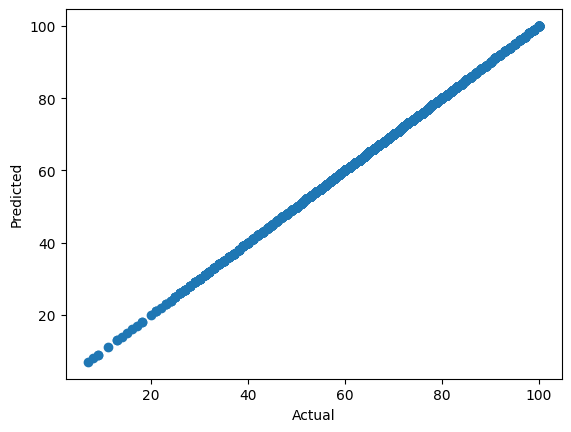

In [50]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

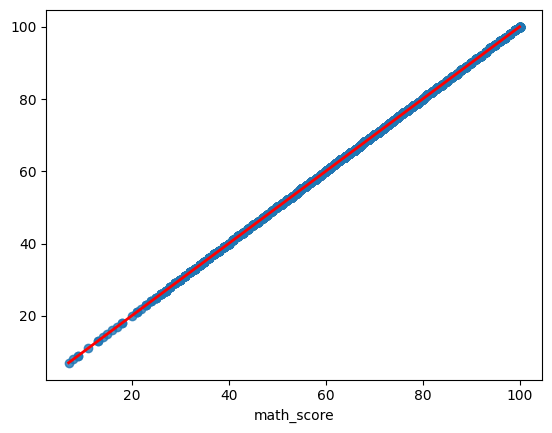

In [51]:
sns.regplot(x=y_test,y=y_pred,ci=None,line_kws={'color': 'red', 'linestyle': '-', 'linewidth': 2})

#### Difference between Actual and Predicted Values

In [52]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df.head()

,Actual Value,Predicted Value,Difference
13551,55.0,55.0,4.263256e-14
6325,86.0,86.0,-8.526513e-14
16886,88.0,88.0,2.842171e-14
11836,37.0,37.0,2.842171e-14
30136,70.0,70.0,-1.421085e-14
